<a href="https://colab.research.google.com/github/madz23/keras_mnistdigits/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Neural Networks Homework 1

Madison May

CS 4499 - Leslie Kerby



# **MNIST Digits and Keras**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data. 

**Part 1** </br>
Using the Keras Sequential API, create a neural network with two hidden layers of 500 neurons each. Train it for 30 epochs. Graph the accuracy and loss for the training and validation sets. Does your model become overfit? If so, at about what epoch? Re-train your neural network for that number of epochs. 

Now test your neural network on your testing data. What accuracy do you achieve? Is it about the same as the accuracy on the validation data?

Plot several of the misclassified images from your model. 

**Part 2** </br>
Try to improve your model by changing your architecture (try different numbers of neurons per layer, and/or more layers) and report again on accuracies and plot several misclassified images.

**Part 3** </br>
Which model did best? Discuss.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns


import numpy as np

np.random.seed(48)
tf.random.set_seed(48)


# Pull the data set
mnist_digit_dataset = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist_digit_dataset.load_data()


In [ ]:
type(x_train_full)

numpy.ndarray

In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

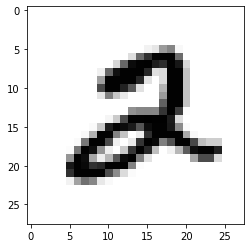

In [ ]:
plt.imshow(x_train_full[5], cmap = 'binary')

In [ ]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
Counter(y_train_full)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

# Part 1

In [ ]:

# 1: Preprocess the Data

# Scale to [0, 1]
x_train_full = x_train_full / 255
x_test = x_test / 255


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
# Reshape the data to 1 dimension
x_train_full = x_train_full.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Create validation dataset
x_train_train, x_train_validate, y_train_train, y_train_validate = train_test_split(x_train_full, y_train_full, test_size = 5000)

In [ ]:
x_train_full.shape

(60000, 784)

In [ ]:
x_train_train.shape

(55000, 784)

In [ ]:
# 2: Create a Model

data_model = keras.models.Sequential()
data_model.add(keras.layers.Dense(500, activation = "relu", input_shape = (784,), name = "1-hidden-layer"))
data_model.add(keras.layers.Dense(500, activation = "relu", input_shape = (784,), name = "2-hidden-layer"))
data_model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))


In [ ]:
data_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1-hidden-layer (Dense)      (None, 500)               392500    
                                                                 
 2-hidden-layer (Dense)      (None, 500)               250500    
                                                                 
 Output_Layer (Dense)        (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


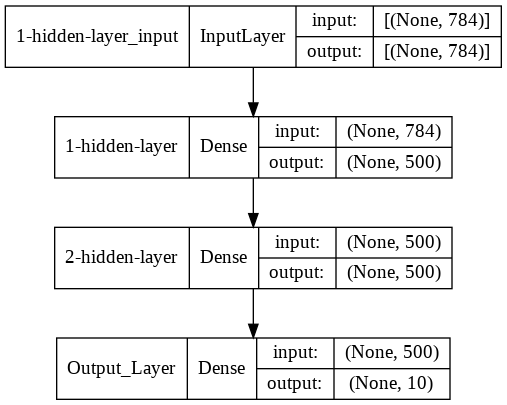

In [ ]:
# This cell is not necessary for the assignment, just helpful for me
keras.utils.plot_model(data_model, show_shapes = True)

In [ ]:
# 3: Compile the model
# We will do this using the cross entropy loss function. 
data_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [ ]:
y_train_train[0]

3

In [ ]:
# 4: Fit on data (train)
# This is the big stuff
history = data_model.fit(x_train_train, y_train_train, epochs = 30, batch_size = 32, validation_data = (x_train_validate, y_train_validate))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5773 - accuracy: 0.8581 - val_loss: 0.3224 - val_accuracy: 0.9048
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2807 - accuracy: 0.9191 - val_loss: 0.2502 - val_accuracy: 0.9290
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2296 - accuracy: 0.9342 - val_loss: 0.2122 - val_accuracy: 0.9394
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1955 - accuracy: 0.9445 - val_loss: 0.1848 - val_accuracy: 0.9456
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1702 - accuracy: 0.9513 - val_loss: 0.1624 - val_accuracy: 0.9512
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1507 - accuracy: 0.9567 - val_loss: 0.1467 - val_accuracy: 0.9560
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1351 - accuracy: 0.9611 - val_loss: 0.1319 - val_ac

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

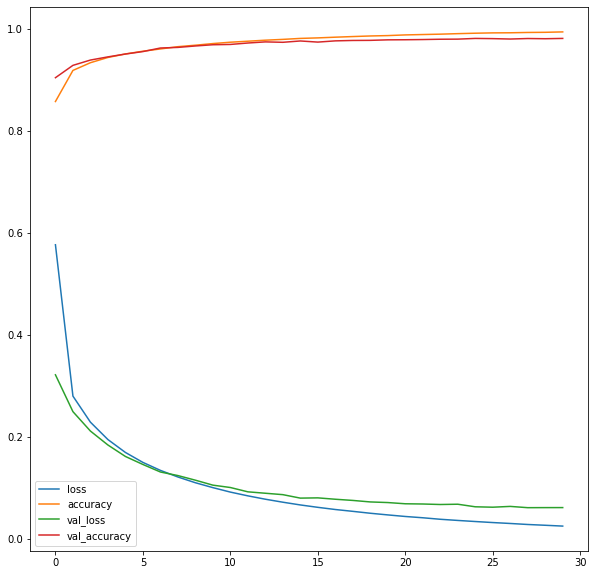

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (10, 10))

In [ ]:
# Part 5: Validation
data_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9782


[0.06958368420600891, 0.9782000184059143]

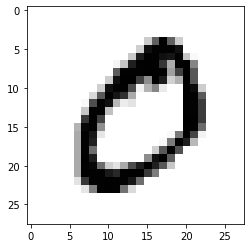

In [ ]:
plt.imshow(x_train_full[1].reshape(28, 28), cmap = "binary")

In [ ]:
# Let's see if it can accurately identify these images
np.argmax(data_model.predict(x_train_full[:1]))

5

In [ ]:
# I tend to get pretty high accuracy levels from training this data set one time (0.97 ish),
# but it can probably be retrained once or twice to get close to 0.99 accuracy.
history_2 = data_model.fit(x_train_train, y_train_train, epochs = 12, validation_data = (x_train_validate, y_train_validate))

Epoch 1/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0245 - accuracy: 0.9950 - val_loss: 0.0599 - val_accuracy: 0.9826
Epoch 2/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0232 - accuracy: 0.9956 - val_loss: 0.0596 - val_accuracy: 0.9820
Epoch 3/12
1719/1719 [==============================] - 15s 8ms/step - loss: 0.0217 - accuracy: 0.9958 - val_loss: 0.0586 - val_accuracy: 0.9834
Epoch 4/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0206 - accuracy: 0.9964 - val_loss: 0.0605 - val_accuracy: 0.9830
Epoch 5/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0194 - accuracy: 0.9966 - val_loss: 0.0584 - val_accuracy: 0.9838
Epoch 6/12
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0183 - accuracy: 0.9971 - val_loss: 0.0585 - val_accuracy: 0.9830
Epoch 7/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.0579 - val_ac

In [ ]:
data_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9805


[0.06426364928483963, 0.9804999828338623]

In [ ]:
history_3 = data_model.fit(x_train_train, y_train_train, epochs = 9, validation_data = (x_train_validate, y_train_validate))

Epoch 1/9
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0128 - accuracy: 0.9984 - val_loss: 0.0572 - val_accuracy: 0.9838
Epoch 2/9
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0122 - accuracy: 0.9986 - val_loss: 0.0574 - val_accuracy: 0.9834
Epoch 3/9
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0115 - accuracy: 0.9987 - val_loss: 0.0563 - val_accuracy: 0.9848
Epoch 4/9
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.9989 - val_loss: 0.0583 - val_accuracy: 0.9836
Epoch 5/9
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0105 - accuracy: 0.9988 - val_loss: 0.0565 - val_accuracy: 0.9844
Epoch 6/9
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 0.0573 - val_accuracy: 0.9838
Epoch 7/9
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0097 - accuracy: 0.9991 - val_loss: 0.0568 - val_accuracy:

In [ ]:
data_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9806


[0.06613769382238388, 0.9805999994277954]

In [ ]:
histories = pd.DataFrame(history.history)
histories

,loss,accuracy,val_loss,val_accuracy
0,0.577334,0.858109,0.322419,0.9048
1,0.280674,0.919073,0.250207,0.9290
2,0.229578,0.934182,0.212169,0.9394
3,0.195502,0.944455,0.184831,0.9456
4,0.170230,0.951345,0.162372,0.9512
5,0.150714,0.956727,0.146660,0.9560
6,0.135114,0.961145,0.131902,0.9630
7,0.122124,0.965600,0.124907,0.9642
8,0.110858,0.968491,0.115869,0.9670
9,0.101244,0.971709,0.106136,0.9694


In [ ]:
histories = histories.append(pd.DataFrame(history_2.history), 
                             ignore_index=True)
histories

,loss,accuracy,val_loss,val_accuracy
0,0.577334,0.858109,0.322419,0.9048
1,0.280674,0.919073,0.250207,0.9290
2,0.229578,0.934182,0.212169,0.9394
3,0.195502,0.944455,0.184831,0.9456
4,0.170230,0.951345,0.162372,0.9512
5,0.150714,0.956727,0.146660,0.9560
6,0.135114,0.961145,0.131902,0.9630
7,0.122124,0.965600,0.124907,0.9642
8,0.110858,0.968491,0.115869,0.9670
9,0.101244,0.971709,0.106136,0.9694


In [ ]:
histories = histories.append(pd.DataFrame(history_3.history), 
                             ignore_index=True)
histories

,loss,accuracy,val_loss,val_accuracy
0,0.577334,0.858109,0.322419,0.9048
1,0.280674,0.919073,0.250207,0.9290
2,0.229578,0.934182,0.212169,0.9394
3,0.195502,0.944455,0.184831,0.9456
4,0.170230,0.951345,0.162372,0.9512
5,0.150714,0.956727,0.146660,0.9560
6,0.135114,0.961145,0.131902,0.9630
7,0.122124,0.965600,0.124907,0.9642
8,0.110858,0.968491,0.115869,0.9670
9,0.101244,0.971709,0.106136,0.9694


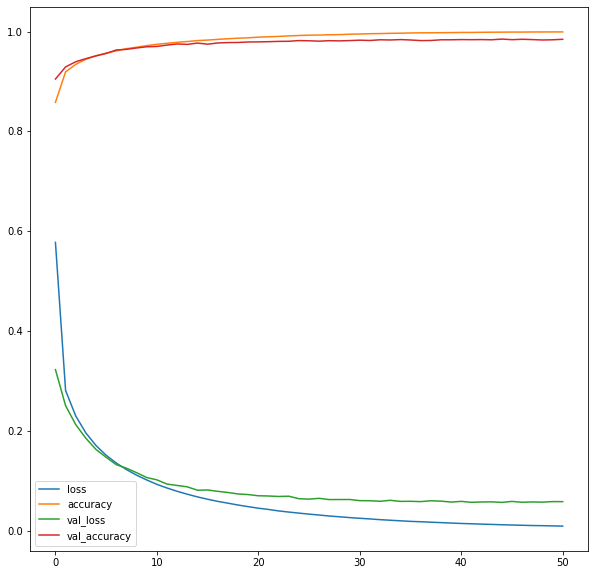

In [ ]:
histories.plot(figsize = (10, 10))

In [ ]:
data_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9806


[0.06613769382238388, 0.9805999994277954]

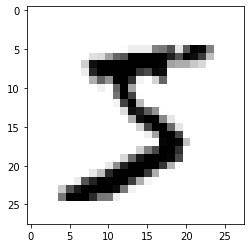

In [ ]:
# Predicting other cases
plt.imshow(x_train_full[0].reshape(28, 28), cmap = 'binary')

In [ ]:
data_model.predict(x_train_full[:1])

array([[4.7159303e-12, 2.8540811e-10, 1.6129713e-08, 4.3988451e-03,
        1.7995217e-17, 9.9560118e-01, 2.2712914e-14, 1.7634803e-10,
        4.0121129e-11, 6.4133067e-11]], dtype=float32)

<BarContainer object of 10 artists>

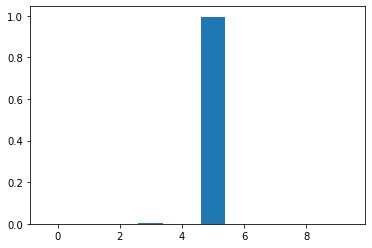

In [ ]:
plt.bar(range(10), data_model.predict(x_train_full[:1])[0])

In [ ]:
predictions = np.argmax(data_model.predict(x_test), axis = 1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

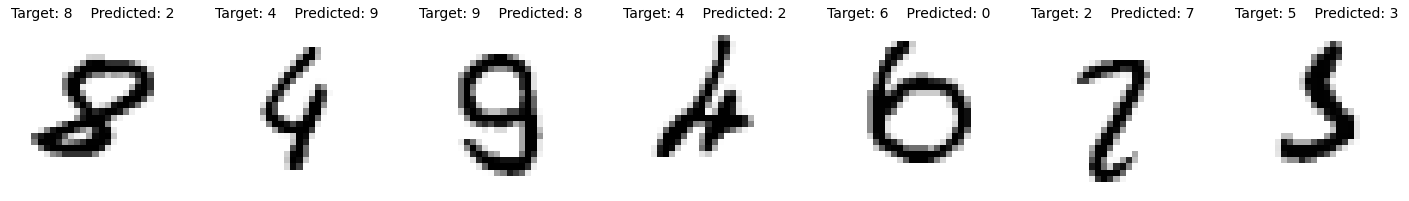

In [ ]:
# Now I will find some misclassified images and display them here
misclassified = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassified.append(index)
  index += 1

# This should be the total number of misclassified images
len(misclassified)

# We will show 7 misclassfied images
plt.figure(figsize=(25,4))
for index in range(7):
  plt.subplot(1, 7, index + 1)
  plt.imshow(x_test[misclassified[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassified[index]]]}    Predicted: {classes[predictions[misclassified[index]]]}', fontsize=14)

plt.show()

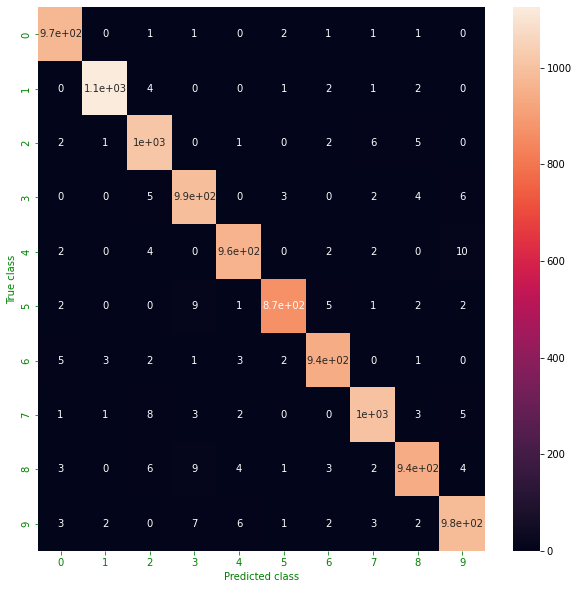

In [ ]:
# Confusion Matrix
matrix = confusion_matrix(y_test, np.argmax(data_model.predict(x_test), axis = -1))
matrix_dataframe = pd.DataFrame(matrix, index = classes, columns = classes)
plt.figure(figsize = (10, 10))
sns.heatmap(matrix_dataframe, annot = True)
plt.ylabel('True class', color = 'green')
plt.xlabel('Predicted class', color = 'green')
plt.tick_params(color = 'green', labelcolor = 'green')
plt.show()

In [ ]:
data_model.save('digits')

INFO:tensorflow:Assets written to: digits/assets


INFO:tensorflow:Assets written to: digits/assets


# Part 2

1.   List item
2.   List item



In [ ]:
# Clear weights to retrain the NN
keras.backend.clear_session()
np.random.seed(40)
tf.random.set_seed(40)


# Pull the data set
mnist_digit_dataset = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist_digit_dataset.load_data()

In [ ]:
# Reshape the data to 1 dimension
x_train_full = x_train_full.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Create validation dataset
x_train_train, x_train_validate, y_train_train, y_train_validate = train_test_split(x_train_full, y_train_full, test_size = 5000)

In [ ]:

# Retraintng with more  neurons and hidden layers
data_model_2 = keras.models.Sequential()
data_model_2.add(keras.layers.Dense(600, activation = "relu", input_shape = (784,), name = "1-hidden-layer"))
data_model_2.add(keras.layers.Dense(600, activation = "relu", input_shape = (784,), name = "2-hidden-layer"))
data_model_2.add(keras.layers.Dense(600, activation = "relu", input_shape = (784,), name = "3-hidden-layer"))
data_model_2.add(keras.layers.Dense(600, activation = "relu", input_shape = (784,), name = "4-hidden-layer"))
data_model_2.add(keras.layers.Dense(600, activation = "relu", input_shape = (784,), name = "5-hidden-layer"))

data_model_2.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))


In [ ]:
data_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1-hidden-layer (Dense)      (None, 600)               471000    
                                                                 
 2-hidden-layer (Dense)      (None, 600)               360600    
                                                                 
 3-hidden-layer (Dense)      (None, 600)               360600    
                                                                 
 4-hidden-layer (Dense)      (None, 600)               360600    
                                                                 
 5-hidden-layer (Dense)      (None, 600)               360600    
                                                                 
 Output_Layer (Dense)        (None, 10)                6010      
                                                                 
Total params: 1,919,410
Trainable params: 1,919,410
Non-

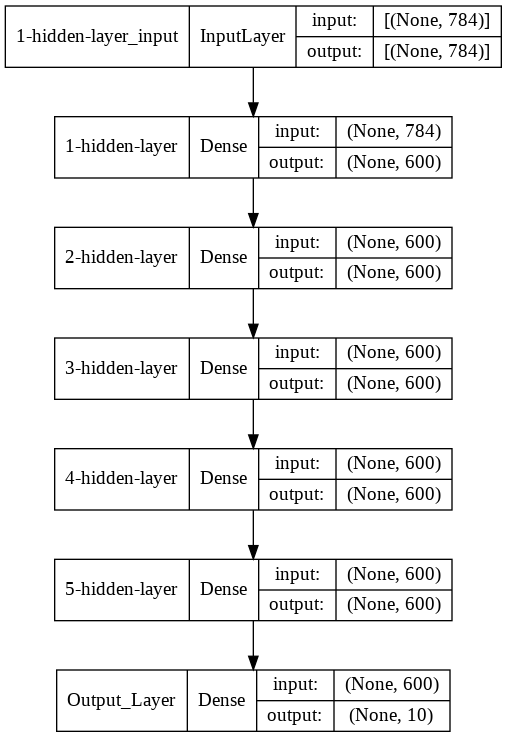

In [ ]:
keras.utils.plot_model(data_model_2, show_shapes = True)

In [ ]:
# Compile the model
data_model_2.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [ ]:
data_model_2.layers[0].get_weights()

[array([[ 5.9430748e-03,  3.4092836e-02,  4.4280067e-02, ...,
         -1.3201758e-02,  5.5322036e-02,  2.2126988e-02],
        [ 6.0617998e-03,  3.9425097e-02,  5.6365140e-02, ...,
          7.6366514e-03, -3.2892887e-02,  2.3508675e-02],
        [ 1.5367724e-02,  2.4426512e-02, -6.9652423e-03, ...,
         -4.7589626e-02, -4.1312702e-02,  3.3355355e-02],
        ...,
        [-3.8037036e-02, -6.4371154e-02,  5.0834320e-02, ...,
         -1.8023014e-02, -5.8141824e-02,  4.7564209e-02],
        [-2.9267170e-02,  5.8803938e-02, -2.9027365e-02, ...,
         -3.2887548e-02,  1.1502184e-02, -1.1242926e-05],
        [ 3.7818179e-03,  2.4663337e-02, -2.8662369e-02, ...,
         -3.8556755e-05,  6.3709907e-02, -6.1317995e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [ ]:
# Fit the model
history = data_model_2.fit(x_train_train, y_train_train, epochs = 30, batch_size = 32, 
                         validation_data = (x_train_validate, y_train_validate))

Epoch 1/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.6390 - accuracy: 0.8273 - val_loss: 0.3217 - val_accuracy: 0.8996
Epoch 2/30
1719/1719 [==============================] - 30s 18ms/step - loss: 0.2244 - accuracy: 0.9350 - val_loss: 0.1794 - val_accuracy: 0.9466
Epoch 3/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.1604 - accuracy: 0.9530 - val_loss: 0.1438 - val_accuracy: 0.9588
Epoch 4/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.1254 - accuracy: 0.9623 - val_loss: 0.1173 - val_accuracy: 0.9658
Epoch 5/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.1014 - accuracy: 0.9699 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 6/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0841 - accuracy: 0.9749 - val_loss: 0.0929 - val_accuracy: 0.9754
Epoch 7/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.0955 -

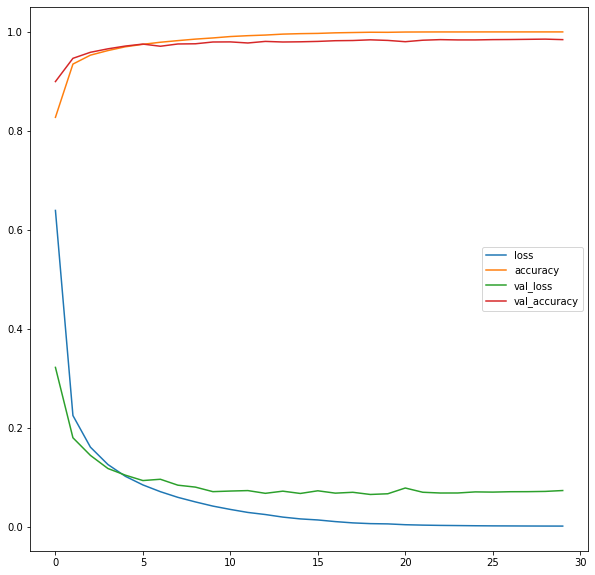

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (10, 10))

In [ ]:
# We have reached pretty high accuracy levels in just one training. We will train once more for completeness
history_2 = data_model_2.fit(x_train_train, y_train_train, epochs=10, validation_data=(x_train_validate, y_train_validate))

Epoch 1/10
1719/1719 [==============================] - 33s 19ms/step - loss: 7.5767e-04 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9840
Epoch 2/10
1719/1719 [==============================] - 31s 18ms/step - loss: 7.1868e-04 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9848
Epoch 3/10
1719/1719 [==============================] - 31s 18ms/step - loss: 6.5167e-04 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9848
Epoch 4/10
1719/1719 [==============================] - 31s 18ms/step - loss: 6.1278e-04 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9844
Epoch 5/10
1719/1719 [==============================] - 31s 18ms/step - loss: 5.7078e-04 - accuracy: 1.0000 - val_loss: 0.0751 - val_accuracy: 0.9844
Epoch 6/10
1719/1719 [==============================] - 31s 18ms/step - loss: 5.3970e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9842
Epoch 7/10
1719/1719 [==============================] - 32s 18ms/step - loss: 5.0764e-04 - accuracy:

In [ ]:
data_model_2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 20.9090 - accuracy: 0.9770


[20.909011840820312, 0.9769999980926514]

In [ ]:
histories = pd.Dataframe(history.history)
histories.append(pd.DataFrame(history_2.history), ignore_index = True)

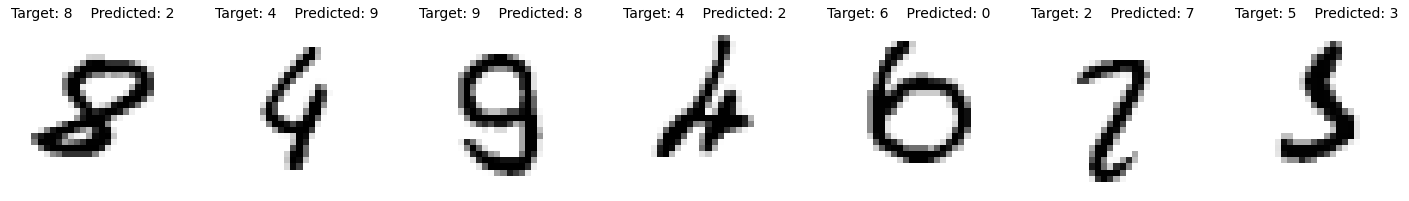

In [ ]:
# Now I will find some misclassified images and display them here
misclassified = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassified.append(index)
  index += 1

# This should be the total number of misclassified images
len(misclassified)

# We will show 7 misclassfied images
plt.figure(figsize=(25,4))
for index in range(7):
  plt.subplot(1, 7, index + 1)
  plt.imshow(x_test[misclassified[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassified[index]]]}    Predicted: {classes[predictions[misclassified[index]]]}', fontsize=14)

plt.show()

# Part 3

The model built in Part Two techinically worked best. After running once, the model in Part 1 acheived about 0.96 accuracy, which is pretty good. After retraining, it usually hits 0.98 or 0.99. The second model constructed in Part Two pretty much always hits 0.99, and sometimes it rounds off to 1.0. This is really nice, but it takes significantly longer to run than the model in Part 1 because it has five hidden layers, each with 600 neurons. 

In this context though, it may not really matter which model trained faster as long as we are acheiving the highest accuracy levels. These are not necessarily algorithms that need to be run all the time. 

In practice, I would probably choose some middle ground between the two models to acheive the best model possible. 